In [0]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 42kB/s 
     |████████████████████████████████| 4.3MB 40.6MB/s 
     |████████████████████████████████| 501kB 51.9MB/s 


In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.0.0-rc0


In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
!pip install kaggle

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"solveyourerror","key":"ba2ddc59efb623337c4f7d945d370cbc"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# change the permission
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 99% 667M/675M [00:04<00:00, 199MB/s]
100% 675M/675M [00:04<00:00, 168MB/s]


In [0]:
from zipfile import ZipFile
file_name = "/content/cell-images-for-detecting-malaria.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [0]:
img_width = 64
img_height = 64

In [0]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [0]:
train_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'training'
                                                   )

Found 22048 images belonging to 2 classes.


In [0]:
validation_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'validation'
                                                   )

Found 5510 images belonging to 2 classes.


In [0]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

## CNN Model Building


In [0]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape = (img_width, img_height, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [0]:
history = model.fit_generator(generator=train_data_generator,
                              steps_per_epoch = len(train_data_generator),
                              epochs = 5,
                              validation_data = validation_data_generator,
                              validation_steps = len(validation_data_generator))

Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
1378/1378 [==============================] - 157s 114ms/step - loss: 0.6541 - accuracy: 0.6126 - val_loss: 0.5821 - val_accuracy: 0.6946
Epoch 2/5
1378/1378 [==============================] - 155s 113ms/step - loss: 0.3280 - accuracy: 0.8722 - val_loss: 0.1928 - val_accuracy: 0.9354
Epoch 3/5
1378/1378 [==============================] - 159s 115ms/step - loss: 0.1998 - accuracy: 0.9365 - val_loss: 0.1775 - val_accuracy: 0.9332
Epoch 4/5
1378/1378 [==============================] - 154s 112ms/step - loss: 0.1766 - accuracy: 0.9457 - val_loss: 0.2047 - val_accuracy: 0.9241
Epoch 5/5
1378/1378 [==============================] - 156s 113ms/step - loss: 0.1621 - accuracy: 0.9508 - val_loss: 0.2835 - val_accuracy: 0.9078


In [0]:
history.history

{'accuracy': [0.61257255, 0.87223333, 0.93650216, 0.945664, 0.9508346],
 'loss': [0.6540978543990236,
  0.3280180056845696,
  0.1998470826020413,
  0.17658138393116263,
  0.16208087808671523],
 'val_accuracy': [0.69455534, 0.9353902, 0.93321234, 0.92413795, 0.907804],
 'val_loss': [0.5821340810561526,
  0.19276792448068011,
  0.17753980293654015,
  0.20471578776512456,
  0.2835443196143361]}

In [0]:

def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

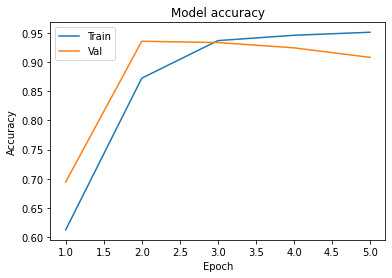

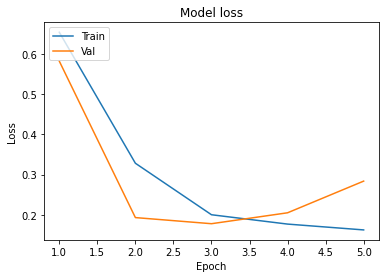

In [0]:
plot_learningCurve(history, 5)

Confusion Matrix


In [0]:
import matplotlib.pyplot as plt

In [0]:
!pip install mlxtend

In [0]:
import tensorflow as tf

from tensorflow import keras

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [0]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat)

NameError: ignored